In [16]:
import numpy as np
import pandas as pd
from datetime import date 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv(r"C:\Users\bahar.inan\Downloads\MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")
#df=pd.read_csv('https://data.ny.gov/resource/wujg-7c2s.csv')

#df = pd.read_csv('https://data.ny.gov/resource/k7j9-jnct.csv')
df.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,06/27/2022 03:00:00 AM,R412,Hunts Point Av (6),BX,6,all,24,0,40.82095,-73.89055,POINT (-73.89055 40.82095)
1,07/25/2022 03:00:00 AM,R412,Hunts Point Av (6),BX,6,all,16,0,40.82095,-73.89055,POINT (-73.89055 40.82095)
2,02/06/2022 09:00:00 PM,R624,Kingston Av (3),BK,3,all,26,0,40.66940,-73.94216,POINT (-73.94216 40.6694)
3,02/07/2022 12:00:00 AM,R624,Kingston Av (3),BK,3,all,2,0,40.66940,-73.94216,POINT (-73.94216 40.6694)
4,02/05/2023 10:00:00 PM,R252,103 St (6),M,6,all,56,0,40.79060,-73.94748,POINT (-73.94748 40.7906)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956086 entries, 0 to 4956085
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int64  
 7   transfers           int64  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), int64(2), object(7)
memory usage: 415.9+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,4956086.0,295.316305,624.966177,1.000000,33.000000,119.00000,316.000000,24840.000000
transfers,4956086.0,12.297784,47.579662,0.000000,0.000000,2.00000,9.000000,2374.000000
latitude,4956086.0,40.730706,0.079809,40.576126,40.675377,40.72028,40.793920,40.903126
longitude,4956086.0,-73.932529,0.056542,-74.030876,-73.979920,-73.94405,-73.896736,-73.755400


In [20]:
df[df.duplicated()] #tekrar eden deger yok

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference


In [21]:
df.isnull().sum() #null deger yok

transit_timestamp     0
station_complex_id    0
station_complex       0
borough               0
routes                0
payment_method        0
ridership             0
transfers             0
latitude              0
longitude             0
Georeference          0
dtype: int64

In [22]:
df['date']=pd.to_datetime(df['transit_timestamp']).dt.date  # timestamp içinden tarihi aldık.
df.sample(100)

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date
770449,11/15/2022 04:00:00 AM,R333,"225 St (2,5)",BX,"2,5",all,46,0,40.888023,-73.860344,POINT (-73.860344 40.888023),2022-11-15
2155423,05/28/2022 07:00:00 AM,N222,"Bedford Park Blvd (B,D)",BX,"B,D",all,185,6,40.873245,-73.887140,POINT (-73.88714 40.873245),2022-05-28
969709,03/28/2023 10:00:00 PM,R231,33 St (6),M,6,all,430,3,40.746082,-73.982080,POINT (-73.98208 40.746082),2023-03-28
3848389,09/05/2022 08:00:00 PM,H012,Lorimer St (L)/Metropolitan Av (G),BK,"G,,L",all,326,3,40.714060,-73.950270,POINT (-73.95027 40.71406),2022-09-05
527152,02/23/2023 02:00:00 AM,N210,"174-175 Sts (B,D)",BX,"B,D",all,5,0,40.845900,-73.910130,POINT (-73.91013 40.8459),2023-02-23
...,...,...,...,...,...,...,...,...,...,...,...,...
2631842,04/20/2023 11:00:00 AM,R125,Christopher St-Sheridan Sq (1),M,1,all,273,3,40.733420,-74.002910,POINT (-74.00291 40.73342),2023-04-20
2031316,12/24/2022 08:00:00 PM,E014,Bay Pkwy (D),BK,D,all,52,2,40.601875,-73.993730,POINT (-73.99373 40.601875),2022-12-24
4946123,06/15/2022 06:00:00 AM,R419,Zerega Av (6),BX,6,all,168,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2022-06-15
283954,12/30/2022 11:00:00 AM,N512,"14 St (F,M,1,2,3)/6 Av (L)",M,"F,M,3,1,2,,L",all,1055,22,40.738228,-73.996210,POINT (-73.99621 40.738228),2022-12-30


In [23]:
df.date.max()

datetime.date(2023, 6, 14)

In [24]:
df_1=df[(df['date'] >=pd.to_datetime('2023-03-01').date()) & (df['date'] <=pd.to_datetime('2023-05-31').date())]
df_1.head(10) # veri setini filtreledik. (Mart-Mayıs)

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date
14,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22
19,05/26/2023 05:00:00 AM,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26
25,05/02/2023 09:00:00 PM,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02
32,05/27/2023 01:00:00 PM,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27
33,05/02/2023 06:00:00 PM,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02
39,03/12/2023 06:00:00 AM,R252,103 St (6),M,6,all,77,0,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-03-12
44,05/17/2023 08:00:00 PM,R252,103 St (6),M,6,all,276,4,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-17
45,03/05/2023 01:00:00 PM,R252,103 St (6),M,6,all,250,0,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-03-05
48,03/26/2023 04:00:00 PM,H007,1 Av (L),M,L,all,1051,18,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-03-26
52,03/18/2023 09:00:00 PM,R170,103 St (1),M,1,all,234,2,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-03-18


In [25]:
df_1['time']=pd.to_datetime(df_1['transit_timestamp']).dt.time
df_1.head(10) #filtrelenmiş veri seti üzerindeki timestamp içinden time aldık.

C:\Users\bahar.inan\AppData\Local\Temp\ipykernel_31008\228878226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time']=pd.to_datetime(df_1['transit_timestamp']).dt.time


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time
14,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00
19,05/26/2023 05:00:00 AM,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26,05:00:00
25,05/02/2023 09:00:00 PM,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02,21:00:00
32,05/27/2023 01:00:00 PM,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27,13:00:00
33,05/02/2023 06:00:00 PM,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02,18:00:00
39,03/12/2023 06:00:00 AM,R252,103 St (6),M,6,all,77,0,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-03-12,06:00:00
44,05/17/2023 08:00:00 PM,R252,103 St (6),M,6,all,276,4,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-17,20:00:00
45,03/05/2023 01:00:00 PM,R252,103 St (6),M,6,all,250,0,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-03-05,13:00:00
48,03/26/2023 04:00:00 PM,H007,1 Av (L),M,L,all,1051,18,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-03-26,16:00:00
52,03/18/2023 09:00:00 PM,R170,103 St (1),M,1,all,234,2,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-03-18,21:00:00


In [26]:
df_1[(df_1['date']==pd.to_datetime('2023-05-22').date()) & (df_1['station_complex'].str.strip()=='103 St (1)')] 

#ridership bilgisinin kümüle gitmediğini saatlik toplamı verdiğini gördük.

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time
14,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00
3202,05/22/2023 05:00:00 PM,R170,103 St (1),M,1,all,640,12,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,17:00:00
3401,05/22/2023 02:00:00 AM,R170,103 St (1),M,1,all,9,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,02:00:00
8111,05/22/2023 05:00:00 AM,R170,103 St (1),M,1,all,60,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,05:00:00
9630,05/22/2023 01:00:00 PM,R170,103 St (1),M,1,all,469,6,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,13:00:00
10469,05/22/2023 01:00:00 AM,R170,103 St (1),M,1,all,9,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,01:00:00
10826,05/22/2023 06:00:00 AM,R170,103 St (1),M,1,all,215,0,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,06:00:00
11145,05/22/2023 04:00:00 PM,R170,103 St (1),M,1,all,623,9,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,16:00:00
13498,05/22/2023 12:00:00 PM,R170,103 St (1),M,1,all,465,8,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,12:00:00
13790,05/22/2023 09:00:00 PM,R170,103 St (1),M,1,all,242,1,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,21:00:00


In [27]:
df_1['day_of_week']=pd.to_datetime(df_1['transit_timestamp']).dt.dayofweek
df_1.head(10)

C:\Users\bahar.inan\AppData\Local\Temp\ipykernel_31008\2007399940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['day_of_week']=pd.to_datetime(df_1['transit_timestamp']).dt.dayofweek


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time,day_of_week
14,05/22/2023 08:00:00 PM,R170,103 St (1),M,1,all,388,4,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-05-22,20:00:00,0
19,05/26/2023 05:00:00 AM,R252,103 St (6),M,6,all,93,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-26,05:00:00,4
25,05/02/2023 09:00:00 PM,H007,1 Av (L),M,L,all,663,15,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-05-02,21:00:00,1
32,05/27/2023 01:00:00 PM,R252,103 St (6),M,6,all,318,1,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-27,13:00:00,5
33,05/02/2023 06:00:00 PM,R252,103 St (6),M,6,all,489,5,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-02,18:00:00,1
39,03/12/2023 06:00:00 AM,R252,103 St (6),M,6,all,77,0,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-03-12,06:00:00,6
44,05/17/2023 08:00:00 PM,R252,103 St (6),M,6,all,276,4,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-05-17,20:00:00,2
45,03/05/2023 01:00:00 PM,R252,103 St (6),M,6,all,250,0,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-03-05,13:00:00,6
48,03/26/2023 04:00:00 PM,H007,1 Av (L),M,L,all,1051,18,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-03-26,16:00:00,6
52,03/18/2023 09:00:00 PM,R170,103 St (1),M,1,all,234,2,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-03-18,21:00:00,5


In [28]:
def time_grouping(time):
    if time >= pd.to_datetime('07:00:00').time() and time <pd.to_datetime('09:00:00').time():
        return '1 07_09 Morning'
    elif time >= pd.to_datetime('09:00:00').time() and time <pd.to_datetime('12:00:00').time():
        return '2 09_12 Late Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time <pd.to_datetime('14:00:00').time():
        return '3 12_14 Afternoon'
    elif time >= pd.to_datetime('14:00:00').time() and time <pd.to_datetime('17:00:00').time():
        return '4 14_17 Late Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time <pd.to_datetime('19:00:00').time():
        return '5 17_19 Evening'
    elif time >= pd.to_datetime('19:00:00').time() and time <pd.to_datetime('23:00:00').time():
        return '6 19_23 Night'
    else:
        return '7 Late Night'
    

In [29]:
def day_name(day_of_week):
    if day_of_week==0:
        return 'Monday'
    elif day_of_week==1:
        return 'Tuesday'
    elif day_of_week==2:
        return 'Wednesday'
    elif day_of_week==3:
        return 'Thursday'
    elif day_of_week==4:
        return 'Friday'
    elif day_of_week==5:
        return 'Saturday'
    else:
        return 'Sunday'

In [30]:
df_1['time_group']=df_1['time'].apply(time_grouping) #saatleri grupladık.
df_1['name_of_day']=df_1['day_of_week'].apply(day_name) #gun adlarını aldık.

C:\Users\bahar.inan\AppData\Local\Temp\ipykernel_31008\1813525391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time_group']=df_1['time'].apply(time_grouping) #saatleri grupladık.
C:\Users\bahar.inan\AppData\Local\Temp\ipykernel_31008\1813525391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['name_of_day']=df_1['day_of_week'].apply(day_name) #gun adlarını aldık.


In [38]:
df_2=df_1.loc[::,['station_complex','ridership','date','time','time_group','day_of_week','name_of_day']]
df_2.head(10) #istediğimiz kolonları seçtik.

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
14,103 St (1),388,2023-05-22,20:00:00,6 19_23 Night,0,Monday
19,103 St (6),93,2023-05-26,05:00:00,7 Late Night,4,Friday
25,1 Av (L),663,2023-05-02,21:00:00,6 19_23 Night,1,Tuesday
32,103 St (6),318,2023-05-27,13:00:00,3 12_14 Afternoon,5,Saturday
33,103 St (6),489,2023-05-02,18:00:00,5 17_19 Evening,1,Tuesday
39,103 St (6),77,2023-03-12,06:00:00,7 Late Night,6,Sunday
44,103 St (6),276,2023-05-17,20:00:00,6 19_23 Night,2,Wednesday
45,103 St (6),250,2023-03-05,13:00:00,3 12_14 Afternoon,6,Sunday
48,1 Av (L),1051,2023-03-26,16:00:00,4 14_17 Late Afternoon,6,Sunday
52,103 St (1),234,2023-03-18,21:00:00,6 19_23 Night,5,Saturday


In [39]:
df_3=df_2[(df_2['day_of_week']==0) | (df_2['day_of_week']==1) | (df_2['day_of_week']==2) | (df_2['day_of_week']==3) | (df_2['day_of_week']==4)]
df_3.head(10) # Haftasonu turizm amaçlı geziler de olabileceğinden haftasonlarını eledik.

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
14,103 St (1),388,2023-05-22,20:00:00,6 19_23 Night,0,Monday
19,103 St (6),93,2023-05-26,05:00:00,7 Late Night,4,Friday
25,1 Av (L),663,2023-05-02,21:00:00,6 19_23 Night,1,Tuesday
33,103 St (6),489,2023-05-02,18:00:00,5 17_19 Evening,1,Tuesday
44,103 St (6),276,2023-05-17,20:00:00,6 19_23 Night,2,Wednesday
67,103 St (6),133,2023-04-13,22:00:00,6 19_23 Night,3,Thursday
73,1 Av (L),694,2023-03-28,21:00:00,6 19_23 Night,1,Tuesday
80,1 Av (L),659,2023-03-29,22:00:00,6 19_23 Night,2,Wednesday
83,103 St (6),97,2023-05-04,05:00:00,7 Late Night,3,Thursday
85,103 St (1),7,2023-03-24,01:00:00,7 Late Night,4,Friday


In [41]:
df_grouped=df_3.groupby(['station_complex'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(10)
df_grouped #en yoğun ilk 10 istasyonu bulduk. Sırada bu istasyonların en yoğun saatlerini bulmak var.

,station_complex,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",10895923
1,"Grand Central-42 St (S,4,5,6,7)",6487282
2,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",4817324
3,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",4366837
4,"Fulton St (A,C,J,Z,2,3,4,5)",3800897
5,"34 St-Penn Station (A,C,E)",3367287
6,"59 St-Columbus Circle (A,B,C,D,1)",3292436
7,"34 St-Penn Station (1,2,3)",3111892
8,Flushing-Main St (7),2871760
9,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",2771713


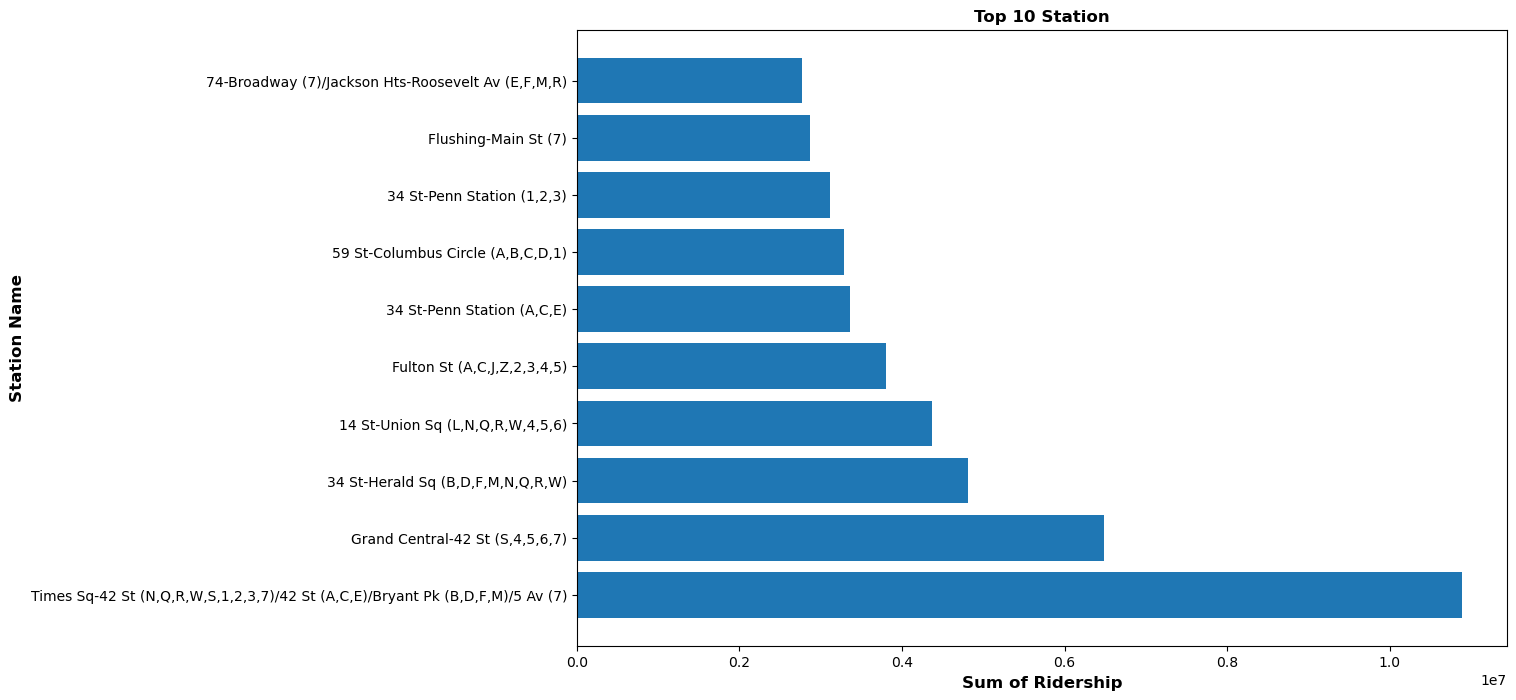

In [34]:
plt.figure(figsize=[12,8])
plt.barh(df_grouped.station_complex,df_grouped.ridership)
plt.title('Top 10 Station',fontsize = 12, weight = 'bold', color='k');
plt.xlabel('Sum of Ridership',fontsize = 12, weight = 'bold', color='k')
plt.ylabel('Station Name',fontsize = 12, weight = 'bold', color='k');

<AxesSubplot:xlabel='ridership', ylabel='station_complex'>

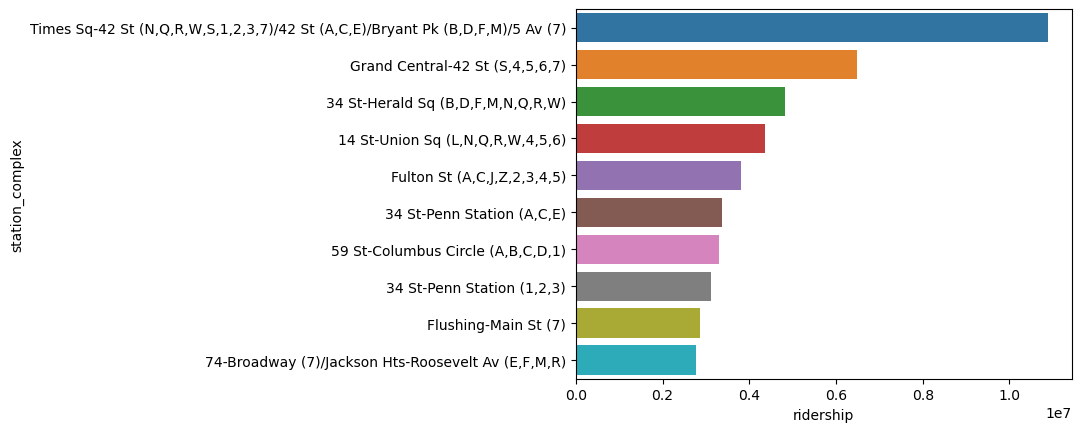

In [35]:
sns.barplot(x='ridership', y='station_complex', data=df_grouped)

In [ ]:
"""
ilk 3 istasyondaki yolcu sayısı genel toplamın %50' sini oluşturduğu için 
sadece ilk 3 istasyona yönelik gün ve saat kırılımları hazırlanmıştır.
"""

In [47]:
df_first_station=df_3[df_3['station_complex']=='Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)']
df_first_station.head()

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
4653227,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7979,2023-04-17,19:00:00,6 19_23 Night,0,Monday
4653240,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",6016,2023-05-16,10:00:00,2 09_12 Late Morning,1,Tuesday
4653259,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7918,2023-04-14,20:00:00,6 19_23 Night,4,Friday
4653306,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",17363,2023-04-17,17:00:00,5 17_19 Evening,0,Monday
4653319,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",408,2023-05-04,02:00:00,7 Late Night,3,Thursday


In [88]:
df_first_station_grouped=df_first_station.groupby(['name_of_day'])[['ridership']].sum().sort_values('ridership', ascending=False)
df_first_station_grouped

,ridership
name_of_day,
Wednesday,2512142
Thursday,2264045
Tuesday,2253733
Friday,2004745
Monday,1861258


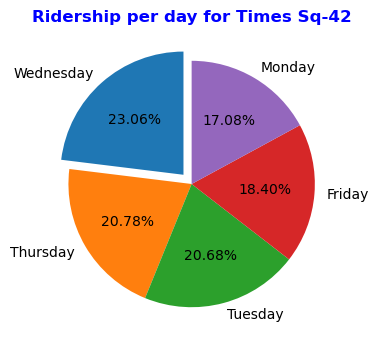

In [162]:
plt.figure(figsize = [8,4])
plt.title("Ridership per day for Times Sq-42", weight='bold',color="blue");
plt.pie(df_first_station_grouped['ridership'],labels=df_first_station_grouped.index,explode = [.1,.0,.0,.0,.0],autopct='%1.2f%%', startangle=90);

In [96]:
df_first_station_busiest_day=df_3[(df_3['station_complex']=='Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)')
                                 
                                ]
df_first_station_busiest_day.head()

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
4653227,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7979,2023-04-17,19:00:00,6 19_23 Night,0,Monday
4653240,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",6016,2023-05-16,10:00:00,2 09_12 Late Morning,1,Tuesday
4653259,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",7918,2023-04-14,20:00:00,6 19_23 Night,4,Friday
4653306,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",17363,2023-04-17,17:00:00,5 17_19 Evening,0,Monday
4653319,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",408,2023-05-04,02:00:00,7 Late Night,3,Thursday


In [111]:
df_first_station_busiest_day_grouped=df_first_station_busiest_day.groupby(['name_of_day','time_group'])[['ridership']].sum().reset_index()
df_first_station_busiest_day_grouped = df_first_station_busiest_day_grouped.pivot_table(index='time_group', columns='name_of_day', values='ridership')
df_first_station_busiest_day_grouped

name_of_day,Friday,Monday,Thursday,Tuesday,Wednesday
time_group,,,,,
1 07_09 Morning,203953,239845,272108,283322,307014
2 09_12 Late Morning,236932,237993,271176,271469,292572
3 12_14 Afternoon,161247,139463,155090,147689,166787
4 14_17 Late Afternoon,396102,345704,395057,388424,449943
5 17_19 Evening,339969,403018,481232,513096,565698
6 19_23 Night,436520,318582,475052,450876,496049
7 Late Night,230022,176653,214330,198857,234079


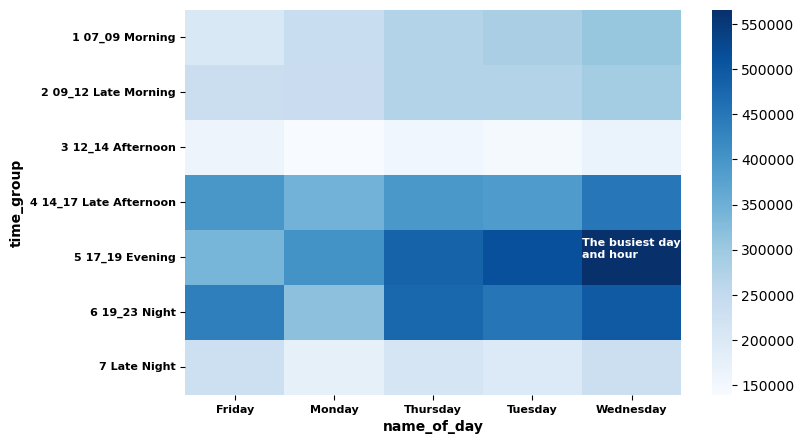

In [158]:
plt.figure(figsize = [8,5])
plt.xlabel('name_of_day', fontsize=10, weight = 'bold', color='black')
plt.ylabel('time_group',fontsize = 10, weight = 'bold', color='black')
plt.xticks(fontsize = 8, weight = 'bold', color='black')
plt.yticks(fontsize = 8, weight = 'bold', color='black')
plt.text(4,4.5, 'The busiest day\nand hour', weight = 'bold',fontsize = 8, color = 'white'); # Yazının başlama yeri(x, y)
sns.heatmap(df_first_station_busiest_day_grouped, cmap='Blues');

In [163]:
df_second_station=df_3[df_3['station_complex']=='Grand Central-42 St (S,4,5,6,7)']
df_second_station.head()

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
3258076,"Grand Central-42 St (S,4,5,6,7)",5005,2023-05-25,14:00:00,4 14_17 Late Afternoon,3,Thursday
3258086,"Grand Central-42 St (S,4,5,6,7)",6726,2023-04-20,15:00:00,4 14_17 Late Afternoon,3,Thursday
3258155,"Grand Central-42 St (S,4,5,6,7)",110,2023-05-01,01:00:00,7 Late Night,0,Monday
3258168,"Grand Central-42 St (S,4,5,6,7)",259,2023-05-25,01:00:00,7 Late Night,3,Thursday
3258173,"Grand Central-42 St (S,4,5,6,7)",60,2023-03-17,04:00:00,7 Late Night,4,Friday


In [164]:
df_second_station_grouped=df_second_station.groupby(['name_of_day'])[['ridership']].sum().sort_values('ridership', ascending=False)
df_second_station_grouped

,ridership
name_of_day,
Wednesday,1519429
Tuesday,1386145
Thursday,1366106
Monday,1133991
Friday,1081611


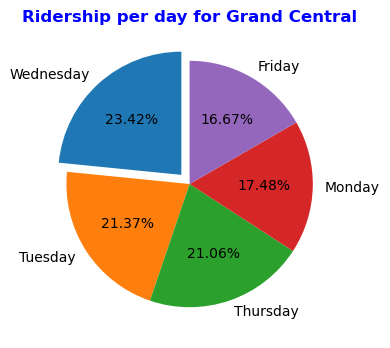

In [165]:
plt.figure(figsize = [8,4])
plt.title("Ridership per day for Grand Central", weight='bold',color="blue");
plt.pie(df_second_station_grouped['ridership'],labels=df_second_station_grouped.index,explode = [.1,.0,.0,.0,.0],autopct='%1.2f%%', startangle=90);

In [166]:
df_second_station_busiest_day=df_3[(df_3['station_complex']=='Grand Central-42 St (S,4,5,6,7)')
                                 
                                ]
df_second_station_busiest_day.head()

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
3258076,"Grand Central-42 St (S,4,5,6,7)",5005,2023-05-25,14:00:00,4 14_17 Late Afternoon,3,Thursday
3258086,"Grand Central-42 St (S,4,5,6,7)",6726,2023-04-20,15:00:00,4 14_17 Late Afternoon,3,Thursday
3258155,"Grand Central-42 St (S,4,5,6,7)",110,2023-05-01,01:00:00,7 Late Night,0,Monday
3258168,"Grand Central-42 St (S,4,5,6,7)",259,2023-05-25,01:00:00,7 Late Night,3,Thursday
3258173,"Grand Central-42 St (S,4,5,6,7)",60,2023-03-17,04:00:00,7 Late Night,4,Friday


In [167]:
df_second_station_busiest_day_grouped=df_second_station_busiest_day.groupby(['name_of_day','time_group'])[['ridership']].sum().reset_index()
df_second_station_busiest_day_grouped = df_second_station_busiest_day_grouped.pivot_table(index='time_group', columns='name_of_day', values='ridership')
df_second_station_busiest_day_grouped

name_of_day,Friday,Monday,Thursday,Tuesday,Wednesday
time_group,,,,,
1 07_09 Morning,113093,157620,190039,210528,226259
2 09_12 Late Morning,141884,150122,182931,181053,195879
3 12_14 Afternoon,103801,88662,101334,95582,106589
4 14_17 Late Afternoon,254246,227063,265582,259433,286204
5 17_19 Evening,228531,288331,348902,377188,406673
6 19_23 Night,167183,163436,200748,189364,216392
7 Late Night,72873,58757,76570,72997,81433


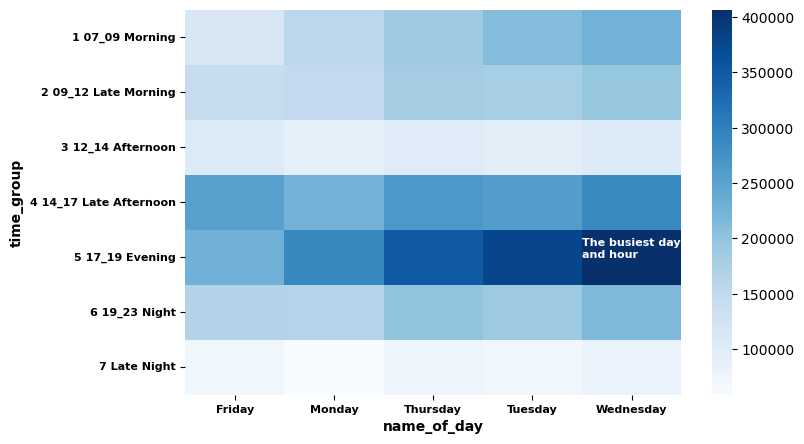

In [168]:
plt.figure(figsize = [8,5])
plt.xlabel('name_of_day', fontsize=10, weight = 'bold', color='black')
plt.ylabel('time_group',fontsize = 10, weight = 'bold', color='black')
plt.xticks(fontsize = 8, weight = 'bold', color='black')
plt.yticks(fontsize = 8, weight = 'bold', color='black')
plt.text(4,4.5, 'The busiest day\nand hour', weight = 'bold',fontsize = 8, color = 'white'); # Yazının başlama yeri(x, y)
sns.heatmap(df_second_station_busiest_day_grouped, cmap='Blues');

In [170]:
df_third_station=df_3[df_3['station_complex']=='34 St-Herald Sq (B,D,F,M,N,Q,R,W)']
df_third_station.head()

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
994508,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2837,2023-03-10,12:00:00,3 12_14 Afternoon,4,Friday
994530,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2454,2023-05-18,10:00:00,2 09_12 Late Morning,3,Thursday
994537,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",206,2023-04-11,01:00:00,7 Late Night,1,Tuesday
994566,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",3763,2023-04-05,20:00:00,6 19_23 Night,2,Wednesday
994575,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",3672,2023-05-15,14:00:00,4 14_17 Late Afternoon,0,Monday


In [171]:
df_third_station_grouped=df_third_station.groupby(['name_of_day'])[['ridership']].sum().sort_values('ridership', ascending=False)
df_third_station_grouped

,ridership
name_of_day,
Wednesday,1075723
Thursday,998725
Tuesday,982083
Friday,916307
Monday,844486


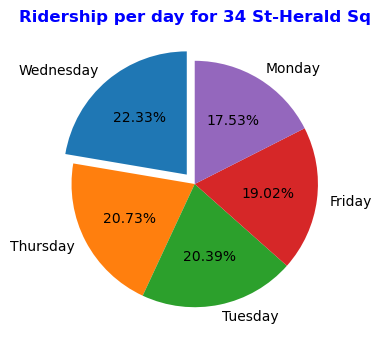

In [172]:
plt.figure(figsize = [8,4])
plt.title("Ridership per day for 34 St-Herald Sq", weight='bold',color="blue");
plt.pie(df_third_station_grouped['ridership'],labels=df_third_station_grouped.index,explode = [.1,.0,.0,.0,.0],autopct='%1.2f%%', startangle=90);

In [173]:
df_third_station_busiest_day=df_3[(df_3['station_complex']=='34 St-Herald Sq (B,D,F,M,N,Q,R,W)')
                                 
                                ]
df_third_station_busiest_day.head()

,station_complex,ridership,date,time,time_group,day_of_week,name_of_day
994508,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2837,2023-03-10,12:00:00,3 12_14 Afternoon,4,Friday
994530,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",2454,2023-05-18,10:00:00,2 09_12 Late Morning,3,Thursday
994537,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",206,2023-04-11,01:00:00,7 Late Night,1,Tuesday
994566,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",3763,2023-04-05,20:00:00,6 19_23 Night,2,Wednesday
994575,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",3672,2023-05-15,14:00:00,4 14_17 Late Afternoon,0,Monday


In [174]:
df_third_station_busiest_day_grouped=df_third_station_busiest_day.groupby(['name_of_day','time_group'])[['ridership']].sum().reset_index()
df_third_station_busiest_day_grouped = df_third_station_busiest_day_grouped.pivot_table(index='time_group', columns='name_of_day', values='ridership')
df_third_station_busiest_day_grouped

name_of_day,Friday,Monday,Thursday,Tuesday,Wednesday
time_group,,,,,
1 07_09 Morning,62576,78398,90428,97604,102631
2 09_12 Late Morning,96737,97433,112586,111453,122752
3 12_14 Afternoon,86665,72273,79794,76095,84620
4 14_17 Late Afternoon,210147,178391,199446,194149,212257
5 17_19 Evening,187057,204783,246439,255401,274853
6 19_23 Night,200133,166291,210331,194377,217680
7 Late Night,72992,46917,59701,53004,60930


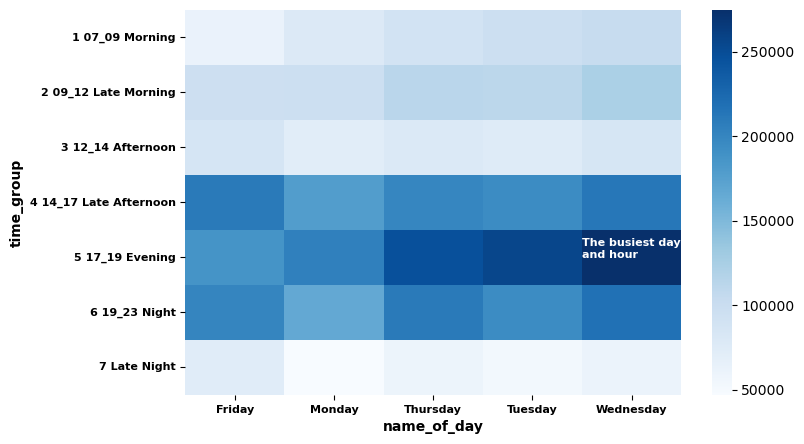

In [175]:
plt.figure(figsize = [8,5])
plt.xlabel('name_of_day', fontsize=10, weight = 'bold', color='black')
plt.ylabel('time_group',fontsize = 10, weight = 'bold', color='black')
plt.xticks(fontsize = 8, weight = 'bold', color='black')
plt.yticks(fontsize = 8, weight = 'bold', color='black')
plt.text(4,4.5, 'The busiest day\nand hour', weight = 'bold',fontsize = 8, color = 'white'); # Yazının başlama yeri(x, y)
sns.heatmap(df_third_station_busiest_day_grouped, cmap='Blues');